In [278]:
import pandas as pd
import statsmodels.api as sm
import re
import numpy as np
from itertools import product

In [347]:
import pandas as pd

# Define file paths and target values
files = {
    "Prescriptive/Uncapped/Maize_Prescriptive_2%_Uncapped.csv": 118000,
    "Prescriptive/Uncapped/Maize_Prescriptive_3.68%_Uncapped.csv": 120000,
    "Prescriptive/Uncapped/Maize_Prescriptive_5%_Uncapped.csv": 121500,
    "Prescriptive/Uncapped/Maize_Prescriptive_8%_Uncapped.csv": 125000
}

dataframes = []  # Store data from each file

# Read, add target column, and append data
for file, target_value in files.items():
    if file.endswith('.csv'):
        df = pd.read_csv(file)
    else:
        df = pd.read_excel(file)
    
    df["Target Values"] = target_value  # Assign target column
    dataframes.append(df)

# Merge all into one final dataset
final_df = pd.concat(dataframes, ignore_index=True)

# Save the combined file
final_df.to_excel("Prescriptive/Uncapped/Combined_Maize_Prescriptive_Uncapped.xlsx", index=False)

print("File successfully created: Combined_Maize_Prescriptive.xlsx")

File successfully created: Combined_Maize_Prescriptive.xlsx


In [280]:
def remove_pattern(col_name):
    return re.sub(r'_[0-9]{3}$', '', col_name)

Zones = pd.read_excel('Zones.xlsx')
Dataset = pd.read_csv('KAG 2016-17/Agriculture/Agriculture_KAG_2016_17.csv')
Dataset.columns = map(remove_pattern, Dataset.columns)

param = pd.read_csv('Params/3_Param_Maize_Multicollinearity.csv')

Working_Directory = pd.read_csv('Working_Directory.csv')
Working_Directory = Working_Directory[['District','Maize_Production','TotalNPK', 'SowingSeedsDistributed_Maize',
'LivestockCensus_2012_Cattle', 'AreaUnderCereals_Maize','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','Maize_Ratio']].copy()

for x in param.columns:
    if(x != 'SowingSeedsDistributed_Maize' and x != 'AreaUnderCereals_Maize'):
        Working_Directory[x] = Working_Directory[x]*Working_Directory['Maize_Ratio']
        
Working_Directory[24:]

,District,Maize_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Maize_Ratio
24,BALLARI,104045,8404.154608,2859.005,23446.847903,49869.5,75198,0.136288
25,BIDAR,2791,249.381182,24.550,2371.831678,1382.0,19908,0.010114
26,KALABURAGI,14621,710.101614,165.000,6221.617910,2634.0,48802,0.013150
27,YADGIRI,2673,368.617469,0.000,1253.317144,961.0,22035,0.004033
28,RAICHUR,723,61.547519,14.350,188.537479,2600.0,26571,0.000525
29,KOPPAL,190252,10997.550403,5292.000,38936.400172,48210.0,82552,0.149521
30,VIJAYANAGARA,104045,8404.154608,2859.005,23446.847903,49869.5,75198,0.136288


In [281]:
Case_file = pd.read_csv('Params/3_Param_Maize_Multicollinearity.csv')
for x in Case_file.columns:
    Working_Directory[x] = Case_file[x]
y = Working_Directory['Maize_Production']
Case_file[:5]

,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK
0,2567.461578,1129.0,438.180210
1,25037.139270,14867.0,3036.080250
2,7729.614277,1987.0,222.225258
3,83821.593090,92194.0,10902.406570
4,85657.632090,173400.0,25702.835480


In [282]:
Working_Directory

,District,Maize_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Maize_Ratio
0,BENGALURU,2879,438.180210,4.450,2567.461578,1129.0,9348,0.018798
1,BENGALURU(R),42583,3036.080250,134.730,25037.139270,14867.0,20281,0.157645
2,RAMANAGARA,10450,222.225258,260.150,7729.614277,1987.0,23868,0.029741
3,CHITRADURGA,271975,10902.406570,5004.000,83821.593090,92194.0,92506,0.303824
4,DAVANAGERE,593544,25702.835480,6124.600,85657.632090,173400.0,78364,0.257947
5,KOLAR,1759,220.782906,51.500,2278.829821,640.0,20140,0.009950
6,CHIKKABALLAPURA,105491,8196.896749,3538.150,71206.945310,59377.0,50370,0.289061
7,SHIVAMOGGA,226532,10428.246260,3814.020,104722.000400,43827.0,32347,0.184215
8,TUMAKURU,66868,2746.313635,1639.850,37944.093760,24207.0,144708,0.071991
9,CHIKKAMAGALURU,61353,8156.290370,2923.790,40572.445630,25831.0,26174,0.120188


In [283]:
district_name_mapping = {
    'BENGALURU': 'Bengaluru (Urban)',
    'BENGALURU(R)': 'Bengaluru (Rural)',
    'RAMANAGARA': 'Ramanagara',
    'CHITRADURGA': 'Chitradurga',
    'DAVANAGERE': 'Davanagere',
    'KOLAR': 'Kolara',
    'CHIKKABALLAPURA': 'Chikkaballapura',
    'SHIVAMOGGA': 'Shivamogga',
    'TUMAKURU': 'Tumakuru',
    'CHIKKAMAGALURU': 'Chikkamagaluru',
    'HASSAN': 'Hassan',
    'KODAGU': 'Kodagu',
    'MANDYA': 'Mandya',
    'MYSURU': 'Mysuru',
    'CHAMARAJANAGAR': 'Chamarajanagara',
    'BELAGAVI': 'Belagavi',
    'VIJAYAPURA': 'Vijayapura',
    'BAGALKOT': 'Bagalkot',
    'DHARAWAD': 'Dharwad',
    'GADAG': 'Gadag',
    'HAVERI': 'Haveri',
    'UTTARA KANNADA': 'Uttara Kannada',
    'BALLARI': 'Ballari',
    'BIDAR': 'Bidar',
    'KALABURAGI': 'Kalburgi',
    'YADGIRI': 'Yadgir',
    'KOPPAL': 'Koppal',
    'VIJAYANAGARA': 'Vijayanagara',
    'DAKSHINA KANNADA': 'Dakshina Kannada',
    'UDUPI': 'Udupi',
    'RAICHUR': 'Raichur'
}
Working_Directory['District_KDG'] = Working_Directory['District'].map(district_name_mapping)


In [284]:
if(len(Case_file) < 31):
    row_24 = Case_file.iloc[24]
    halved_row_24 = row_24 / 2
    Case_file.iloc[24] = halved_row_24
    Case_file.loc[len(Case_file)] = halved_row_24

Case_file[24:]


,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK
24,23446.847900,49869.5,8404.154608
25,2371.831678,1382.0,249.381182
26,6221.617910,2634.0,710.101614
27,1253.317144,961.0,368.617469
28,188.537479,2600.0,61.547519
29,38936.400170,48210.0,10997.550400
30,23446.847900,49869.5,8404.154608


In [285]:
Case_file

,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK
0,2567.461578,1129.0,438.180210
1,25037.139270,14867.0,3036.080250
2,7729.614277,1987.0,222.225258
3,83821.593090,92194.0,10902.406570
4,85657.632090,173400.0,25702.835480
5,2278.829821,640.0,220.782906
6,71206.945310,59377.0,8196.896749
7,104722.000400,43827.0,10428.246260
8,37944.093760,24207.0,2746.313635
9,40572.445630,25831.0,8156.290370


In [286]:
import plotly.express as px

# Create a histogram for Maize_Production
fig = px.histogram(Working_Directory, x='Maize_Production', nbins=10, title='Frequency Distribution of Maize Production')

# Show the histogram
fig.show()

In [287]:
# List of desired percentiles
percentiles = [0.1, 0.15, 0.20, 0.25, 0.75, 0.90, 0.95, 0.99]

# Calculate quantiles for the given percentiles
quantile_values = Working_Directory['Maize_Production'].quantile(percentiles)

# Print each quantile with its corresponding percentile
for p, q in zip(percentiles, quantile_values):
    print(f"{int(p*100)}th percentile: {q}")

10th percentile: 1759.0
15th percentile: 2732.0
20th percentile: 2879.0
25th percentile: 12535.5
75th percentile: 208289.5
90th percentile: 333937.0
95th percentile: 495122.5
99th percentile: 588508.2


In [288]:
Working_Directory

,District,Maize_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Maize_Ratio,District_KDG
0,BENGALURU,2879,438.180210,4.450,2567.461578,1129.0,9348,0.018798,Bengaluru (Urban)
1,BENGALURU(R),42583,3036.080250,134.730,25037.139270,14867.0,20281,0.157645,Bengaluru (Rural)
2,RAMANAGARA,10450,222.225258,260.150,7729.614277,1987.0,23868,0.029741,Ramanagara
3,CHITRADURGA,271975,10902.406570,5004.000,83821.593090,92194.0,92506,0.303824,Chitradurga
4,DAVANAGERE,593544,25702.835480,6124.600,85657.632090,173400.0,78364,0.257947,Davanagere
5,KOLAR,1759,220.782906,51.500,2278.829821,640.0,20140,0.009950,Kolara
6,CHIKKABALLAPURA,105491,8196.896749,3538.150,71206.945310,59377.0,50370,0.289061,Chikkaballapura
7,SHIVAMOGGA,226532,10428.246260,3814.020,104722.000400,43827.0,32347,0.184215,Shivamogga
8,TUMAKURU,66868,2746.313635,1639.850,37944.093760,24207.0,144708,0.071991,Tumakuru
9,CHIKKAMAGALURU,61353,8156.290370,2923.790,40572.445630,25831.0,26174,0.120188,Chikkamagaluru


Finding the delta after removing the districts that are outliers, then for rest of the calculation we only remove the lower outliers.
We tried replacement using the Q1 and Q3 percentile methods :
1) We tried finding outliers using the lower and upper bounds, but that was giving unsatisfactory results with the partitioning.
2) We used the Q1 and Q3 values as the bounds and replaced values below and above them with Q1 and Q3 resp., this wasn't as successful as we anticipated (Percentage changes of 500% for 5% delta, 1000% for 10% delta) so we are back to the discarding method.

In [289]:
print((Working_Directory['Maize_Production'].mean()))

134853.12903225806


In [290]:
# Ensure that the index of y and Case_file are aligned
y = y.loc[Case_file.index]

# Identify rows in Case_file that have any zeros
rows_to_remove = (Case_file == 0).any(axis=1)

rows_to_remove |= Working_Directory['Maize_Production']  < 1000

rows_to_remove |= Working_Directory['Maize_Production'] > 500000
tar = 5
delta_O = tar*0.01*(Working_Directory[~rows_to_remove]['Maize_Production'].mean())

print((Working_Directory[~rows_to_remove]['Maize_Production'].mean()))
print(1.02*(Working_Directory[~rows_to_remove]['Maize_Production'].mean()))
print(1.0368*(Working_Directory[~rows_to_remove]['Maize_Production'].mean()))
print(1.05*(Working_Directory[~rows_to_remove]['Maize_Production'].mean()))
print(1.08*(Working_Directory[~rows_to_remove]['Maize_Production'].mean()))

Target = Working_Directory[~rows_to_remove]['Maize_Production'].mean() + delta_O
print(Target)
rows_to_remove = (Case_file == 0).any(axis=1)

rows_to_remove |= Working_Directory['Maize_Production']  < 0

# rows_to_remove |= Working_Directory['Maize_Production'] > 500000

# Update Case_file and y
Case_file = Case_file[~rows_to_remove].reset_index(drop=True)
y = Working_Directory['Maize_Production'][~rows_to_remove].reset_index(drop=True)

# Verify the length of Case_file
case_file_length = len(Case_file)
print(case_file_length)

115742.80769230769
118057.66384615384
120002.1430153846
121529.94807692307
125002.2323076923
121529.94807692307
30


In [291]:
Case_file.columns

Index(['LivestockCensus_2012_Cattle', 'AreaUnderCereals_Maize', 'TotalNPK'], dtype='object')

In [292]:
import plotly.express as px
import pandas as pd

# Melt the DataFrame to a long format for easier plotting
Case_file_melt = Case_file.melt(var_name='Columns', value_name='Values')

# Create box plots for each column
fig = px.box(Case_file_melt, x='Columns', y='Values', title='Box Plots of Case_file Columns and Maize Production',points = "all")

# Show the figure
fig.show()


In [293]:
Case_file_melt = Working_Directory[['Maize_Production']].melt(var_name='Maize_Production', value_name='Production')

# Create box plots for each column
fig = px.box(Case_file_melt[1:], x='Maize_Production', y='Production', title='Box Plot of Maize Production',points = "all")

# Show the figure
fig.show()

In [294]:
TotalNPK_data = Case_file[['TotalNPK']]

fig = px.box(TotalNPK_data, y='TotalNPK', title='Box Plot of TotalNPK', points='all')

fig.show()

In [295]:
Case_file

,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK
0,2567.461578,1129.0,438.180210
1,25037.139270,14867.0,3036.080250
2,7729.614277,1987.0,222.225258
3,83821.593090,92194.0,10902.406570
4,85657.632090,173400.0,25702.835480
5,2278.829821,640.0,220.782906
6,71206.945310,59377.0,8196.896749
7,104722.000400,43827.0,10428.246260
8,37944.093760,24207.0,2746.313635
9,40572.445630,25831.0,8156.290370


In [296]:
Case_file =sm.add_constant(Case_file)
Case_file.head()

,const,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK
0,1.0,2567.461578,1129.0,438.180210
1,1.0,25037.139270,14867.0,3036.080250
2,1.0,7729.614277,1987.0,222.225258
3,1.0,83821.593090,92194.0,10902.406570
4,1.0,85657.632090,173400.0,25702.835480


In [297]:
# Case_file_1 = Case_file[['const','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','AreaUnderCereals_Maize','TotalNPK']].copy()

In [298]:
Working_Directory

,District,Maize_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Maize_Ratio,District_KDG
0,BENGALURU,2879,438.180210,4.450,2567.461578,1129.0,9348,0.018798,Bengaluru (Urban)
1,BENGALURU(R),42583,3036.080250,134.730,25037.139270,14867.0,20281,0.157645,Bengaluru (Rural)
2,RAMANAGARA,10450,222.225258,260.150,7729.614277,1987.0,23868,0.029741,Ramanagara
3,CHITRADURGA,271975,10902.406570,5004.000,83821.593090,92194.0,92506,0.303824,Chitradurga
4,DAVANAGERE,593544,25702.835480,6124.600,85657.632090,173400.0,78364,0.257947,Davanagere
5,KOLAR,1759,220.782906,51.500,2278.829821,640.0,20140,0.009950,Kolara
6,CHIKKABALLAPURA,105491,8196.896749,3538.150,71206.945310,59377.0,50370,0.289061,Chikkaballapura
7,SHIVAMOGGA,226532,10428.246260,3814.020,104722.000400,43827.0,32347,0.184215,Shivamogga
8,TUMAKURU,66868,2746.313635,1639.850,37944.093760,24207.0,144708,0.071991,Tumakuru
9,CHIKKAMAGALURU,61353,8156.290370,2923.790,40572.445630,25831.0,26174,0.120188,Chikkamagaluru


In [299]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['LivestockCensus_2012_Cattle','AreaUnderCereals_Maize','TotalNPK']

Case_file_1 = Case_file[['const'] + columns_to_standardize].copy()
scaler = StandardScaler()

X_st = pd.DataFrame()
X_st['const'] = Case_file['const']
# X_st[columns_to_standardize] = scaler.fit_transform(Case_file_1[columns_to_standardize])
X_st[columns_to_standardize] = Case_file_1[columns_to_standardize]

y_st = pd.DataFrame()
y_st['Maize_Production'] = Working_Directory[~rows_to_remove]['Maize_Production'].reset_index(drop=True)
# y_st['Target_Production'] = (1+Target)*y_st['Maize_Production']
# columns_to_standardize = ['Maize_Production','Target_Production']

columns_to_standardize = ['Maize_Production']
# y_st[columns_to_standardize] = scaler.fit_transform(y_st[columns_to_standardize])
# columns_to_standardize = ['GroundNut Production','Target Production']
y_st.head()

,Maize_Production
0,2879
1,42583
2,10450
3,271975
4,593544


In [300]:
y_st

,Maize_Production
0,2879
1,42583
2,10450
3,271975
4,593544
5,1759
6,105491
7,226532
8,66868
9,61353


In [301]:
# Get the row with the maximum value in 'Maize_Production'
max_row = Working_Directory[~rows_to_remove][Working_Directory[~rows_to_remove]['Maize_Production'] == Working_Directory[~rows_to_remove]['Maize_Production'].max()]

# Get the row with the minimum value in 'Maize_Production'
min_row = Working_Directory[~rows_to_remove][Working_Directory[~rows_to_remove]['Maize_Production'] == Working_Directory[~rows_to_remove]['Maize_Production'].min()]

# Print the rows
print("Row with maximum Maize_Production:\n", max_row)
print("\nRow with minimum Maize_Production:\n", min_row)


Row with maximum Maize_Production:
      District  Maize_Production     TotalNPK  SowingSeedsDistributed_Maize  \
4  DAVANAGERE            593544  25702.83548                        6124.6   

   LivestockCensus_2012_Cattle  AreaUnderCereals_Maize  \
4                  85657.63209                173400.0   

   NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea  \
4                                              78364                  

   Maize_Ratio District_KDG  
4     0.257947   Davanagere  

Row with minimum Maize_Production:
    District  Maize_Production  TotalNPK  SowingSeedsDistributed_Maize  \
11    UDUPI               109  2.304863                           0.0   

    LivestockCensus_2012_Cattle  AreaUnderCereals_Maize  \
11                    94.499008                     8.0   

    NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea  \
11                                                699                  

    Maize_Ratio District_KDG  
11     0

In [302]:
# model=sm.OLS(y,Case_file_1).fit()
# print(model.summary())
# model.params.values
# coef=model.params.values[1:]
# coef

model=sm.OLS(y_st['Maize_Production'],X_st).fit()
Case_file = X_st
print(model.summary())
model.params.values
coef=model.params.values[1:]
coef

                            OLS Regression Results                            
Dep. Variable:       Maize_Production   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     184.3
Date:                Wed, 28 May 2025   Prob (F-statistic):           1.24e-17
Time:                        15:22:31   Log-Likelihood:                -355.61
No. Observations:                  30   AIC:                             719.2
Df Residuals:                      26   BIC:                             724.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

array([0.56951043, 1.77639672, 5.84472227])

In [303]:
Case_file.drop('const',axis=1,inplace=True)
Case_file[:5]

,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK
0,2567.461578,1129.0,438.180210
1,25037.139270,14867.0,3036.080250
2,7729.614277,1987.0,222.225258
3,83821.593090,92194.0,10902.406570
4,85657.632090,173400.0,25702.835480


In [304]:
Case_file.loc[:,'Beta_0'] = model.params.values[0]
Case_file.loc[:,'Beta_1'] = coef[0]
Case_file.loc[:,'Beta_2'] = coef[1]
Case_file.loc[:,'Beta_3'] = coef[2]
# Case_file.loc[:,'Beta_4'] = coef[3]
# Case_file.loc[:,'Beta_5'] = coef[4]

intervals = np.arange(0, 1.1, 0.1)
# columns=['Sensitivity_SowingSeedsDistributed_Maize', 'Sensitivity_LivestockCensus_2012_Cattle' , 'Sensitivity_AreaUnderCereals_Maize', 'Sensitivity_TotalNPK','Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea']

columns=['Sensitivity_LivestockCensus_2012_Cattle' , 'Sensitivity_AreaUnderCereals_Maize', 'Sensitivity_TotalNPK']
# Generate all possible combinations of elements in arr

num = len(columns)
combinations = product(intervals, repeat=len(columns))
combinations

In [305]:
alpha_df = pd.DataFrame(combinations, columns=columns)
alpha_df

,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK
0,0.0,0.0,0.0
1,0.0,0.0,0.1
2,0.0,0.0,0.2
3,0.0,0.0,0.3
4,0.0,0.0,0.4
...,...,...,...
1326,1.0,1.0,0.6
1327,1.0,1.0,0.7
1328,1.0,1.0,0.8
1329,1.0,1.0,0.9


In [306]:
Case_file['key'] = 1
alpha_df['key'] = 1

# Performing the Cartesian product
result_df = pd.merge( alpha_df, Case_file, on='key').drop('key', axis=1)

print(result_df)

       Sensitivity_LivestockCensus_2012_Cattle  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
...                                        ...   
39925                                      1.0   
39926                                      1.0   
39927                                      1.0   
39928                                      1.0   
39929                                      1.0   

       Sensitivity_AreaUnderCereals_Maize  Sensitivity_TotalNPK  \
0                                     0.0                   0.0   
1                                     0.0                   0.0   
2                                     0.0                   0.0   
3                                     0.0                   0.0   
4                                     0.0                   0.0 

In [307]:
result_df.head()

,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,Beta_0,Beta_1,Beta_2,Beta_3
0,0.0,0.0,0.0,2567.461578,1129.0,438.180210,-6868.089582,0.56951,1.776397,5.844722
1,0.0,0.0,0.0,25037.139270,14867.0,3036.080250,-6868.089582,0.56951,1.776397,5.844722
2,0.0,0.0,0.0,7729.614277,1987.0,222.225258,-6868.089582,0.56951,1.776397,5.844722
3,0.0,0.0,0.0,83821.593090,92194.0,10902.406570,-6868.089582,0.56951,1.776397,5.844722
4,0.0,0.0,0.0,85657.632090,173400.0,25702.835480,-6868.089582,0.56951,1.776397,5.844722


In [308]:
Working_Directory['Maize_Production'].mean()

np.float64(134853.12903225806)

In [309]:
Working_Directory.columns

Index(['District', 'Maize_Production', 'TotalNPK',
       'SowingSeedsDistributed_Maize', 'LivestockCensus_2012_Cattle',
       'AreaUnderCereals_Maize',
       'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea',
       'Maize_Ratio', 'District_KDG'],
      dtype='object')

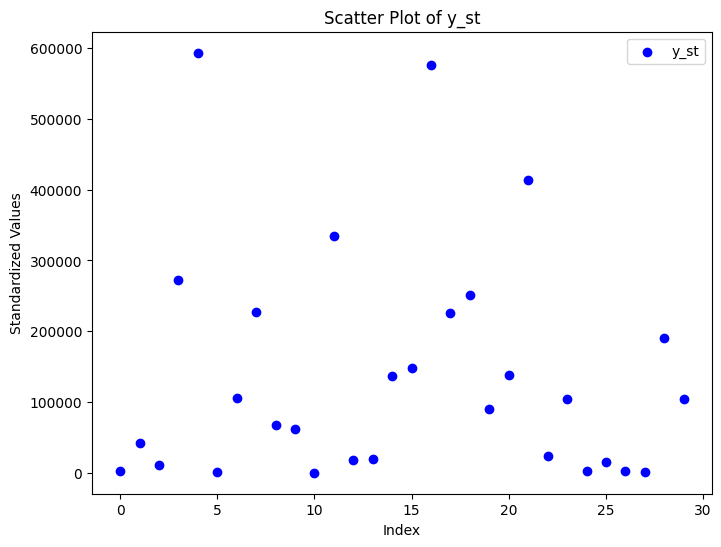

In [310]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_st)), y_st, color='blue', label='y_st')

# Adding labels and title
plt.title('Scatter Plot of y_st')
plt.xlabel('Index')
plt.ylabel('Standardized Values')

# Show legend and plot
plt.legend()
plt.show()


In [311]:
y_st

,Maize_Production
0,2879
1,42583
2,10450
3,271975
4,593544
5,1759
6,105491
7,226532
8,66868
9,61353


In [312]:
Target

np.float64(121529.94807692307)

In [313]:
THRESHOLD = Target
DEFAULT_DELTA_O = delta_O

y_st['delta_O'] = np.where(y_st['Maize_Production'] > THRESHOLD, 0, DEFAULT_DELTA_O)
y_st['delta_O'] = np.where(y_st['Maize_Production'] < 1000, 0, DEFAULT_DELTA_O)

result_df['delta_O'] = np.tile(y_st['delta_O'].values, 1331)

In [314]:
y_st

,Maize_Production,delta_O
0,2879,5787.140385
1,42583,5787.140385
2,10450,5787.140385
3,271975,5787.140385
4,593544,5787.140385
5,1759,5787.140385
6,105491,5787.140385
7,226532,5787.140385
8,66868,5787.140385
9,61353,5787.140385


In [315]:
result_df['delta_O']

0        5787.140385
1        5787.140385
2        5787.140385
3        5787.140385
4        5787.140385
            ...     
39925    5787.140385
39926    5787.140385
39927       0.000000
39928    5787.140385
39929    5787.140385
Name: delta_O, Length: 39930, dtype: float64

In [316]:
print("y_st values:\n", y_st['delta_O'].values[:5])
print("result_df values:\n", result_df['delta_O'].values[:5])

y_st values:
 [5787.14038462 5787.14038462 5787.14038462 5787.14038462 5787.14038462]
result_df values:
 [5787.14038462 5787.14038462 5787.14038462 5787.14038462 5787.14038462]


In [317]:
# delta_O = 5000

# result_df['New_F1'] = result_df['SowingSeedsDistributed_Maize'] + (result_df['Sensitivity_SowingSeedsDistributed_Maize']*delta_O)/result_df['Beta_1']
result_df['New_F1'] = result_df['LivestockCensus_2012_Cattle'] + (result_df['Sensitivity_LivestockCensus_2012_Cattle'] * result_df['delta_O']) / result_df['Beta_1']
result_df['New_F2'] = result_df['AreaUnderCereals_Maize'] + (result_df['Sensitivity_AreaUnderCereals_Maize'] * result_df['delta_O']) / result_df['Beta_2']
result_df['New_F3'] = result_df['TotalNPK'] + (result_df['Sensitivity_TotalNPK'] * result_df['delta_O']) / result_df['Beta_3']

# result_df['New_F1'] = result_df['LivestockCensus_2012_Cattle'] + (result_df['Sensitivity_LivestockCensus_2012_Cattle'] * delta_O) / result_df['Beta_1']
# result_df['New_F2'] = result_df['AreaUnderCereals_Maize'] + (result_df['Sensitivity_AreaUnderCereals_Maize'] * delta_O) / result_df['Beta_2']
# result_df['New_F3'] = result_df['TotalNPK'] + (result_df['Sensitivity_TotalNPK'] * delta_O) / result_df['Beta_3']
# result_df['New_F4'] = result_df['NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'] + (result_df['Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea']*delta_O)/result_df['Beta_4']
result_df['District'] = np.tile(Working_Directory[~rows_to_remove]['District'],11**num)
result_df['District_KDG'] = np.tile(Working_Directory[~rows_to_remove]['District_KDG'],11**num)

result_df['New_F1'] = result_df['New_F1'].apply(lambda x: max(0, x))
result_df['New_F2'] = result_df['New_F2'].apply(lambda x: max(0, x))
result_df['New_F3'] = result_df['New_F3'].apply(lambda x: max(0, x))
# result_df['New_F4'] = result_df['New_F4'].apply(lambda x: max(0, x))
# result_df['New_F5'] = result_df['New_F5'].apply(lambda x: max(0, x))

In [318]:
# Step 1: Tile the original production values
original_production = np.tile(y_st['Maize_Production'].values, 1331)

# Step 2: Calculate New_Production
result_df['New_Production'] = (
    result_df['Beta_1'] * result_df['New_F1'] +
    result_df['Beta_2'] * result_df['New_F2'] +
    result_df['Beta_3'] * result_df['New_F3'] +
    result_df['Beta_0']
)

# # Step 3: Replace with original if new is lower
# result_df['New_Production'] = np.where(
#     result_df['New_Production'] < original_production,
#     original_production,
#     result_df['New_Production']
# )

# + result_df['Beta_4'] * result_df['New_F4']  + result_df['Beta_5'] * result_df['New_F5'] + result_df['Beta_0']
result_df['New_Production'] = result_df['New_Production'].apply(lambda x: max(0, x))

result_df

,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,Beta_0,Beta_1,Beta_2,Beta_3,delta_O,New_F1,New_F2,New_F3,District,District_KDG,New_Production
0,0.0,0.0,0.0,2567.461578,1129.0,438.180210,-6868.089582,0.56951,1.776397,5.844722,5787.140385,2567.461578,1129.000000,438.180210,BENGALURU,Bengaluru (Urban),0.000000
1,0.0,0.0,0.0,25037.139270,14867.0,3036.080250,-6868.089582,0.56951,1.776397,5.844722,5787.140385,25037.139270,14867.000000,3036.080250,BENGALURU(R),Bengaluru (Rural),51545.558144
2,0.0,0.0,0.0,7729.614277,1987.0,222.225258,-6868.089582,0.56951,1.776397,5.844722,5787.140385,7729.614277,1987.000000,222.225258,RAMANAGARA,Ramanagara,2362.551533
3,0.0,0.0,0.0,83821.593090,92194.0,10902.406570,-6868.089582,0.56951,1.776397,5.844722,5787.140385,83821.593090,92194.000000,10902.406570,CHITRADURGA,Chitradurga,268363.839255
4,0.0,0.0,0.0,85657.632090,173400.0,25702.835480,-6868.089582,0.56951,1.776397,5.844722,5787.140385,85657.632090,173400.000000,25702.835480,DAVANAGERE,Davanagere,500167.951069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39925,1.0,1.0,1.0,6221.617910,2634.0,710.101614,-6868.089582,0.56951,1.776397,5.844722,5787.140385,16383.223601,5891.797269,1700.249670,KALABURAGI,Kalburgi,22865.983515
39926,1.0,1.0,1.0,1253.317144,961.0,368.617469,-6868.089582,0.56951,1.776397,5.844722,5787.140385,11414.922835,4218.797269,1358.765525,YADGIRI,Yadgir,15068.692732
39927,1.0,1.0,1.0,188.537479,2600.0,61.547519,-6868.089582,0.56951,1.776397,5.844722,0.000000,188.537479,2600.000000,61.547519,RAICHUR,Raichur,0.000000
39928,1.0,1.0,1.0,38936.400170,48210.0,10997.550400,-6868.089582,0.56951,1.776397,5.844722,5787.140385,49098.005861,51467.797269,11987.698455,KOPPAL,Koppal,182585.730991


In [319]:
result_df[1200:1230]

,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,Beta_0,Beta_1,Beta_2,Beta_3,delta_O,New_F1,New_F2,New_F3,District,District_KDG,New_Production
1200,0.0,0.3,0.7,2567.461578,1129.0,438.180210,-6868.089582,0.56951,1.776397,5.844722,5787.140385,2567.461578,2106.339181,1131.283848,BENGALURU,Bengaluru (Urban),4947.840464
1201,0.0,0.3,0.7,25037.139270,14867.0,3036.080250,-6868.089582,0.56951,1.776397,5.844722,5787.140385,25037.139270,15844.339181,3729.183889,BENGALURU(R),Bengaluru (Rural),57332.698529
1202,0.0,0.3,0.7,7729.614277,1987.0,222.225258,-6868.089582,0.56951,1.776397,5.844722,5787.140385,7729.614277,2964.339181,915.328897,RAMANAGARA,Ramanagara,8149.691918
1203,0.0,0.3,0.7,83821.593090,92194.0,10902.406570,-6868.089582,0.56951,1.776397,5.844722,5787.140385,83821.593090,93171.339181,11595.510209,CHITRADURGA,Chitradurga,274150.979640
1204,0.0,0.3,0.7,85657.632090,173400.0,25702.835480,-6868.089582,0.56951,1.776397,5.844722,5787.140385,85657.632090,174377.339181,26395.939119,DAVANAGERE,Davanagere,505955.091454
1205,0.0,0.3,0.7,2278.829821,640.0,220.782906,-6868.089582,0.56951,1.776397,5.844722,5787.140385,2278.829821,1617.339181,913.886545,KOLAR,Kolara,2644.176814
1206,0.0,0.3,0.7,71206.945310,59377.0,8196.896749,-6868.089582,0.56951,1.776397,5.844722,5787.140385,71206.945310,60354.339181,8890.000388,CHIKKABALLAPURA,Chikkaballapura,192857.841550
1207,0.0,0.3,0.7,104722.000400,43827.0,10428.246260,-6868.089582,0.56951,1.776397,5.844722,5787.140385,104722.000400,44804.339181,11121.349899,SHIVAMOGGA,Shivamogga,197363.664015
1208,0.0,0.3,0.7,37944.093760,24207.0,2746.313635,-6868.089582,0.56951,1.776397,5.844722,5787.140385,37944.093760,25184.339181,3439.417274,TUMAKURU,Tumakuru,79581.283658
1209,0.0,0.3,0.7,40572.445630,25831.0,8156.290370,-6868.089582,0.56951,1.776397,5.844722,5787.140385,40572.445630,26808.339181,8849.394009,CHIKKAMAGALURU,Chikkamagaluru,115582.837205


In [320]:
def normalize_list(lst):
    min_val = min(lst)
    max_val = max(lst)
    normalized_lst = [(x - min_val) / (max_val - min_val) for x in lst]
    return normalized_lst

In [321]:
import pandas as pd
import numpy as np

adjacency_excel = pd.read_excel('Karnataka_District_Adjacency_File.xlsx')

district_codes = sorted(set(adjacency_excel['District_Code']))

n = len(district_codes)
adj_matrix = np.zeros((n, n), dtype=int)

code_to_index = {code: idx for idx, code in enumerate(district_codes)}

for i in range(len(adjacency_excel)):
    district_code = adjacency_excel['District_Code'][i]
    neighbors = [int(num) for num in str(adjacency_excel['District_Neighbors'][i]).split(',') if num.strip().isdigit()]
    
    for neighbor in neighbors:
        adj_matrix[code_to_index[district_code]][code_to_index[neighbor]] = 1
        adj_matrix[code_to_index[neighbor]][code_to_index[district_code]] = 1  # Assuming adjacency is bidirectional

adj_matrix_df = pd.DataFrame(adj_matrix, index=district_codes, columns=district_codes)

print(adj_matrix_df)

adj_matrix_np = adj_matrix_df.to_numpy()

    1   2   3   4   5   6   7   8   9   10  ...  22  23  24  25  26  27  28  \
1    0   1   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2    1   0   1   0   0   1   1   0   1   0  ...   0   0   0   0   0   0   0   
3    1   1   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
4    0   0   0   0   1   0   0   0   1   1  ...   0   0   0   1   0   0   0   
5    0   0   0   1   0   0   0   1   0   1  ...   0   1   0   1   0   0   0   
6    0   1   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
7    0   1   0   0   0   1   0   0   1   0  ...   0   0   0   0   0   0   0   
8    0   0   0   0   1   0   0   0   0   1  ...   0   1   1   0   0   0   0   
9    0   1   1   1   0   0   1   0   0   1  ...   0   0   0   0   0   0   0   
10   0   0   0   1   1   0   0   1   1   0  ...   0   0   0   0   0   0   0   
11   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
12   0   0   0   0   0   0   0   1   0   1  ...   0 

In [322]:
tre = pd.DataFrame()
tre['Maize_Production'] =  y_st['Maize_Production']
tre['District'] = result_df['District']
tre

,Maize_Production,District
0,2879,BENGALURU
1,42583,BENGALURU(R)
2,10450,RAMANAGARA
3,271975,CHITRADURGA
4,593544,DAVANAGERE
5,1759,KOLAR
6,105491,CHIKKABALLAPURA
7,226532,SHIVAMOGGA
8,66868,TUMAKURU
9,61353,CHIKKAMAGALURU


### Normalizing After Calculation

In [323]:
def calculate_avg_capability(capability, neighbors):
    num_neighbors = len(neighbors)
    if num_neighbors == 0:
        return 0
    sum_capabilities = sum(capability[n] for n in neighbors)
    return sum_capabilities / num_neighbors

def calculate_stress_stability(capability, adjacency_matrix):
    n = len(capability)
    stress = np.zeros(n)
    stability = np.zeros(n)
    
    for i in range(n):
        neighbors = [j for j in range(n) if adjacency_matrix[i][j] == 1 and i != j]
        if len(neighbors) > 0:
            avg_capability = calculate_avg_capability(capability, neighbors)
            stress[i] = abs(avg_capability - capability[i])
            # stability[i] = 1 - stress[i]
        else:
            stress[i] = 0  # If no neighbors, stress is zero
            # stability[i] = 1
    min_stress = min(stress)
    max_stress = max(stress)
    
    if max_stress - min_stress > 0:
        stress = (stress - min_stress) / (max_stress - min_stress)
    else:
        stress = np.zeros(n)
    
    stability = 1 - stress
        
    return stress, stability

### Normalizing Before Calculation

In [324]:
def normalize_list(lst):
    min_val = min(lst)
    max_val = max(lst)
    if max_val - min_val > 0:
        return [(x - min_val) / (max_val - min_val) for x in lst]
    else:
        return [0 for _ in lst]

def calculate_avg_capability(capability, neighbors):
    if not neighbors:
        return 0
    return sum(capability[n] for n in neighbors) / len(neighbors)

def calculate_stress_stability(capability, adjacency_matrix):
    # Normalize capability values first
    capability = normalize_list(capability)
    
    n = len(capability)
    stress = np.zeros(n)
    stability = np.zeros(n)
    
    for i in range(n):
        neighbors = [j for j in range(n) if adjacency_matrix[i][j] == 1 and i != j]
        if neighbors:
            avg_capability = calculate_avg_capability(capability, neighbors)
            stress[i] = abs(avg_capability - capability[i])
        else:
            stress[i] = 0  # No neighbors → zero stress

    # No need to normalize stress again; it's based on normalized capability
    stability = 1 - stress
    
    return stress, stability


In [325]:
stress_values_list = []
stability_values_list = []

# Define batch size
batch_size = case_file_length

# Iterate over the New_Production column in batches of 31
num_batches = len(result_df) // batch_size

for i in range(num_batches):
    # Get the batch of 31 production values
    start_idx = i * batch_size
    end_idx = start_idx + batch_size
    batch = result_df['New_Production'][start_idx:end_idx].values
    
    # Calculate the stress and stability values for the batch
    stress_batch, stability_batch = calculate_stress_stability(batch, adj_matrix_np)
    
    stress_values_list.extend(stress_batch)
    stability_values_list.extend(stability_batch)


print(num_batches)
print(len(stress_batch))
print(len(stress_values_list), len(stability_values_list))

result_df['Stress_Values'] = stress_values_list
result_df['Stability_Values'] = stability_values_list

1331
30
39930 39930


In [326]:
result_df.columns

Index(['Sensitivity_LivestockCensus_2012_Cattle',
       'Sensitivity_AreaUnderCereals_Maize', 'Sensitivity_TotalNPK',
       'LivestockCensus_2012_Cattle', 'AreaUnderCereals_Maize', 'TotalNPK',
       'Beta_0', 'Beta_1', 'Beta_2', 'Beta_3', 'delta_O', 'New_F1', 'New_F2',
       'New_F3', 'District', 'District_KDG', 'New_Production', 'Stress_Values',
       'Stability_Values'],
      dtype='object')

In [327]:
viz_df = result_df[['District','Sensitivity_LivestockCensus_2012_Cattle','Sensitivity_AreaUnderCereals_Maize',
                    'Sensitivity_TotalNPK',	'New_Production','Stability_Values']].copy()

# viz_df = result_df[['District','Sensitivity_SowingSeedsDistributed_Maize','Sensitivity_LivestockCensus_2012_Cattle','Sensitivity_AreaUnderCereals_Maize',
#                     'Sensitivity_TotalNPK',	'Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','New_Production','Stability_Values']].copy()

abbreviation_mapping = {
    'BENGALURU': 'BLR',
    'BENGALURU(R)': 'BLR(R)',
    'RAMANAGARA': 'RGA',
    'CHITRADURGA': 'CDA',
    'DAVANAGERE': 'DVG',
    'KOLAR': 'KLR',
    'CHIKKABALLAPURA': 'CKA',
    'SHIVAMOGGA': 'SMG',
    'TUMAKURU': 'TKR',
    'CHIKKAMAGALURU': 'CMG',
    'DAKSHINA KANNADA': 'DKA',
    'UDUPI': 'UPI',
    'HASSAN': 'HSN',
    'KODAGU': 'KDG',
    'MANDYA': 'MDY',
    'MYSURU': 'MYS',
    'CHAMARAJANAGAR': 'CNR',
    'BELAGAVI': 'BLG',
    'VIJAYAPURA': 'VJP',
    'BAGALKOT': 'BKT',
    'DHARAWAD': 'DWD',
    'GADAG': 'GDG',
    'HAVERI': 'HVR',
    'UTTARA KANNADA': 'UTK',
    'BALLARI': 'BLL',
    'BIDAR': 'BDR',
    'KALABURAGI': 'KLB',
    'YADGIRI': 'YDR',
    'RAICHUR': 'RCR',
    'KOPPAL': 'KPL',
    'VIJAYANAGARA' : 'VJN'
}

viz_df['Abbreviation'] = viz_df['District'].map(abbreviation_mapping)

legend_labels = [{'Abbreviation': abb, 'Full Form': full_form} 
                    for abb, full_form in zip(viz_df['Abbreviation'].unique(), viz_df['District'].unique())]

In [328]:
viz_df

,District,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK,New_Production,Stability_Values,Abbreviation
0,BENGALURU,0.0,0.0,0.0,0.000000,0.954997,BLR
1,BENGALURU(R),0.0,0.0,0.0,51545.558144,0.998164,BLR(R)
2,RAMANAGARA,0.0,0.0,0.0,2362.551533,0.717009,RGA
3,CHITRADURGA,0.0,0.0,0.0,268363.839255,0.837339,CDA
4,DAVANAGERE,0.0,0.0,0.0,500167.951069,0.361877,DVG
...,...,...,...,...,...,...,...
39925,KALABURAGI,1.0,1.0,1.0,22865.983515,0.987348,KLB
39926,YADGIRI,1.0,1.0,1.0,15068.692732,0.868046,YDR
39927,RAICHUR,1.0,1.0,1.0,0.000000,0.749060,RCR
39928,KOPPAL,1.0,1.0,1.0,182585.730991,0.887328,KPL


In [329]:
Working_Directory

,District,Maize_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Maize_Ratio,District_KDG
0,BENGALURU,2879,438.180210,4.450,2567.461578,1129.0,9348,0.018798,Bengaluru (Urban)
1,BENGALURU(R),42583,3036.080250,134.730,25037.139270,14867.0,20281,0.157645,Bengaluru (Rural)
2,RAMANAGARA,10450,222.225258,260.150,7729.614277,1987.0,23868,0.029741,Ramanagara
3,CHITRADURGA,271975,10902.406570,5004.000,83821.593090,92194.0,92506,0.303824,Chitradurga
4,DAVANAGERE,593544,25702.835480,6124.600,85657.632090,173400.0,78364,0.257947,Davanagere
5,KOLAR,1759,220.782906,51.500,2278.829821,640.0,20140,0.009950,Kolara
6,CHIKKABALLAPURA,105491,8196.896749,3538.150,71206.945310,59377.0,50370,0.289061,Chikkaballapura
7,SHIVAMOGGA,226532,10428.246260,3814.020,104722.000400,43827.0,32347,0.184215,Shivamogga
8,TUMAKURU,66868,2746.313635,1639.850,37944.093760,24207.0,144708,0.071991,Tumakuru
9,CHIKKAMAGALURU,61353,8156.290370,2923.790,40572.445630,25831.0,26174,0.120188,Chikkamagaluru


In [330]:
y = y_st['Maize_Production']

viz_df['Percentage Change'] = viz_df['New_Production'] - np.tile(y.values, len(viz_df) // case_file_length + 1)[:len(viz_df)]
for i in range(0, len(viz_df), case_file_length):
    viz_df.loc[i:i+case_file_length-1, 'Percentage Change'] = viz_df.loc[i:i+case_file_length-1, 'Percentage Change'] * 100 / y.values + 1e-9
    viz_df['Maize_Production'] = y_st['Maize_Production']

viz_df['Maize_Production'] = np.tile(y.values, len(viz_df) // case_file_length + 1)[:len(viz_df)]
viz_df['Percentage Change'] = viz_df['Percentage Change'].replace([np.inf, -np.inf], 0)

In [331]:
viz_df

,District,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK,New_Production,Stability_Values,Abbreviation,Percentage Change,Maize_Production
0,BENGALURU,0.0,0.0,0.0,0.000000,0.954997,BLR,-100.000000,2879
1,BENGALURU(R),0.0,0.0,0.0,51545.558144,0.998164,BLR(R),21.047268,42583
2,RAMANAGARA,0.0,0.0,0.0,2362.551533,0.717009,RGA,-77.391851,10450
3,CHITRADURGA,0.0,0.0,0.0,268363.839255,0.837339,CDA,-1.327755,271975
4,DAVANAGERE,0.0,0.0,0.0,500167.951069,0.361877,DVG,-15.731951,593544
...,...,...,...,...,...,...,...,...,...
39925,KALABURAGI,1.0,1.0,1.0,22865.983515,0.987348,KLB,56.391379,14621
39926,YADGIRI,1.0,1.0,1.0,15068.692732,0.868046,YDR,463.737102,2673
39927,RAICHUR,1.0,1.0,1.0,0.000000,0.749060,RCR,-100.000000,723
39928,KOPPAL,1.0,1.0,1.0,182585.730991,0.887328,KPL,-4.029534,190252


In [332]:
# viz_df['Actual Change'] = viz_df['New_Production'] - np.tile(y.values, len(viz_df) // case_file_length + 1)[:len(viz_df)]

# # Normalize Actual Change within each set of case_file_length
# for i in range(0, len(viz_df), case_file_length):
#     subset = viz_df.loc[i:i+case_file_length-1, 'Actual Change']
#     viz_df.loc[i:i+case_file_length-1, 'Normalized Change'] = (subset - subset.min()) / (subset.max() - subset.min() + 1e-9)

In [333]:
result_df['Maize_Production'] = viz_df['Maize_Production']
# result_df['Normalized Change'] = viz_df['Normalized Change']
result_df['Percentage Change'] = viz_df['Percentage Change']


In [334]:
delta_O

np.float64(5787.140384615384)

In [335]:
Working_Directory['Maize_Production'].quantile(0.08)

np.float64(1137.3999999999999)

In [336]:
Working_Directory['Maize_Production']

0       2879
1      42583
2      10450
3     271975
4     593544
5       1759
6     105491
7     226532
8      66868
9      61353
10         0
11       109
12    333937
13     17921
14     19387
15    137154
16    147886
17    576758
18    226327
19    251699
20     90634
21    138476
22    413487
23     24088
24    104045
25      2791
26     14621
27      2673
28       723
29    190252
30    104045
Name: Maize_Production, dtype: int64

In [337]:
Working_Directory

,District,Maize_Production,TotalNPK,SowingSeedsDistributed_Maize,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea,Maize_Ratio,District_KDG
0,BENGALURU,2879,438.180210,4.450,2567.461578,1129.0,9348,0.018798,Bengaluru (Urban)
1,BENGALURU(R),42583,3036.080250,134.730,25037.139270,14867.0,20281,0.157645,Bengaluru (Rural)
2,RAMANAGARA,10450,222.225258,260.150,7729.614277,1987.0,23868,0.029741,Ramanagara
3,CHITRADURGA,271975,10902.406570,5004.000,83821.593090,92194.0,92506,0.303824,Chitradurga
4,DAVANAGERE,593544,25702.835480,6124.600,85657.632090,173400.0,78364,0.257947,Davanagere
5,KOLAR,1759,220.782906,51.500,2278.829821,640.0,20140,0.009950,Kolara
6,CHIKKABALLAPURA,105491,8196.896749,3538.150,71206.945310,59377.0,50370,0.289061,Chikkaballapura
7,SHIVAMOGGA,226532,10428.246260,3814.020,104722.000400,43827.0,32347,0.184215,Shivamogga
8,TUMAKURU,66868,2746.313635,1639.850,37944.093760,24207.0,144708,0.071991,Tumakuru
9,CHIKKAMAGALURU,61353,8156.290370,2923.790,40572.445630,25831.0,26174,0.120188,Chikkamagaluru


In [338]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output
import plotly.graph_objects as go

def update_plot(alpha1, alpha2, alpha3):
    
    tolerance = 1e-5 
    filtered_df = viz_df[
        (viz_df['Sensitivity_LivestockCensus_2012_Cattle'].between(alpha1 - tolerance, alpha1 + tolerance)) &
        (viz_df['Sensitivity_AreaUnderCereals_Maize'].between(alpha2 - tolerance, alpha2 + tolerance)) & 
        (viz_df['Sensitivity_TotalNPK'].between(alpha3 - tolerance, alpha3 + tolerance)) 
    ]

    # Create a scatter plot with filtered data
    fig = px.scatter(
        filtered_df, 
        x='Stability_Values', 
        y='Percentage Change', 
        title='Maize Percentage Change vs Stability',
        labels={'Percentage Change': 'Percentage Change', 'Stability_Values': 'Stability'},
        text='Abbreviation',
        opacity=1,
        color=filtered_df['Percentage Change'].apply(lambda val: 'red' if val < 0 else 'darkblue'),  # Conditional coloring
        color_discrete_map={'red': 'red', 'darkblue': 'darkblue'}
    )

    fig.update_traces(textposition='top center', textfont=dict(size=11))

    # Update layout to add annotations and legends
    fig.update_layout(
        annotations=[
            dict(
                x=0.5,
                y=-0.25,
                showarrow=False,
                text=f' α<sub>CT</sub>: {alpha1:.2f}, α<sub>AM</sub>: {alpha2:.2f}, α<sub>NPK</sub>: {alpha3:.2f}',
                xref="paper",
                yref="paper",
                font=dict(size=13)
            )
        ],
        legend_title_text='Districts',
        legend_title=dict(font=dict(size=12)),
    )

    # Adding custom legends with abbreviations and full forms
    legend_labels = [{'Abbreviation': abb, 'Full Form': full_form} 
                     for abb, full_form in zip(filtered_df['Abbreviation'].unique(), filtered_df['District'].unique())]

    for label in legend_labels:
        fig.add_trace(go.Scatter(
            x=[None],
            y=[None],
            mode='markers',
            marker=dict(color='darkblue'),
            name=f"{label['Abbreviation']}: {label['Full Form']}"
        ))

    # Adding average lines for stability and percentage change
    avg_stability = filtered_df['Stability_Values'].mean()
    avg_precent = filtered_df['Percentage Change'].mean()

    fig.add_shape(
        type='line',
        x0=avg_stability, y0=0, x1=avg_stability, y1=1,
        line=dict(color='black', width=1.5, dash='dash'),
        yref='paper'
    )

    fig.add_shape(
        type='line',
        x0=0, y0=avg_precent, x1=1, y1=avg_precent,
        line=dict(color='black', width=1.5, dash='dash'),
        xref='paper'
    )

    fig.add_annotation(
        x=avg_stability+0.0075,
        y=-0.07,
        text=f'Avg Stability: {avg_stability:.2f}',
        showarrow=False,
        font=dict(size=10.7),
        textangle=90  # Rotate text using textangle in annotations
    )


    fig.add_trace(go.Scatter(
        x=[0.3],
        y=[avg_precent+4.5],
        text=[f'Avg Impact: {avg_precent:.2f}'],
        mode="text",
        showlegend=False,
        textfont=dict(size=10.7)
    ))

    clear_output()

    display(fig)
    


# Creating sliders for interaction
alpha1_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αCT:')
alpha2_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αAM:')
alpha3_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αNPK:')

# Creating interactive plot
interactive_plot = interact(update_plot, alpha1=alpha1_slider, alpha2=alpha2_slider, alpha3=alpha3_slider)

# Create update button to trigger plot update
update_button = widgets.Button(description="Update Plot")
update_button.on_click(lambda _: update_plot(alpha1_slider.value, alpha2_slider.value, alpha3_slider.value))

# Displaying the interactive plot along with the sliders and update button
display(widgets.HBox([update_button, alpha1_slider, alpha2_slider, alpha3_slider]))
display(interactive_plot)

interactive(children=(FloatSlider(value=0.5, description='αCT:', max=1.0), FloatSlider(value=0.5, description=…

<function __main__.update_plot(alpha1, alpha2, alpha3)>

In [339]:
tolerance = 1e-5
filtered_rows = viz_df[
    (viz_df['Sensitivity_LivestockCensus_2012_Cattle'].between(0.3 - tolerance, 0.3 + tolerance)) &
    (viz_df['Sensitivity_AreaUnderCereals_Maize'].between(0.5 - tolerance, 0.5 + tolerance)) &
    (viz_df['Sensitivity_TotalNPK'].between(0.8 - tolerance, 0.8 + tolerance))
]
filtered_rows

,District,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK,New_Production,Stability_Values,Abbreviation,Percentage Change,Maize_Production
12780,BENGALURU,0.3,0.5,0.8,8420.124695,0.954302,BLR,192.466992,2879
12781,BENGALURU(R),0.3,0.5,0.8,60804.982760,0.999501,BLR(R),42.791684,42583
12782,RAMANAGARA,0.3,0.5,0.8,11621.976149,0.721594,RGA,11.215083,10450
12783,CHITRADURGA,0.3,0.5,0.8,277623.263871,0.839156,CDA,2.076758,271975
12784,DAVANAGERE,0.3,0.5,0.8,509427.375685,0.371064,DVG,-14.171927,593544
12785,KOLAR,0.3,0.5,0.8,6116.461045,0.798667,KLR,247.723766,1759
12786,CHIKKABALLAPURA,0.3,0.5,0.8,196330.125780,0.759392,CKA,86.110783,105491
12787,SHIVAMOGGA,0.3,0.5,0.8,200835.948246,0.955429,SMG,-11.343233,226532
12788,TUMAKURU,0.3,0.5,0.8,83053.567889,0.938522,TKR,24.205252,66868
12789,CHIKKAMAGALURU,0.3,0.5,0.8,119055.121435,0.859214,CMG,94.049389,61353


In [340]:
new_val = filtered_rows['New_Production']
old_val = y_st['Maize_Production']

import plotly.graph_objects as go

# Define the values
new_val = filtered_rows['New_Production']
old_val = y_st['Maize_Production']
abbreviations = filtered_rows['Abbreviation']

# Create the figure
fig = go.Figure()

# Add the Old Production bars
fig.add_trace(go.Bar(
    x=abbreviations,
    y=old_val,
    name='Old Production',
    marker_color='orange'
))


# Add the New Production bars
fig.add_trace(go.Bar(
    x=abbreviations,
    y=new_val,
    name='New Production',
    marker_color='blue'
))


# Update layout for better readability
fig.update_layout(
    title= f'Comparison of New and Old Maize Production ( {tar}% change in State Average Production )',
    xaxis_title='Districts',
    yaxis_title='Production Values',
    barmode='group',  # To display bars side by side
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    legend_title='Production Type'
)

# Show the figure
fig.show()

In [341]:
viz_df['New_Production'] = viz_df['New_Production'].apply(lambda x: max(0, x))
y = y_st['Maize_Production']

viz_df['Impact'] = viz_df['New_Production'] - np.tile(y.values, len(viz_df) // case_file_length + 1)[:len(viz_df)]
for i in range(0, len(viz_df), case_file_length):
    viz_df.loc[i:i+case_file_length-1, 'Impact'] = viz_df.loc[i:i+case_file_length-1, 'Impact']
    # viz_df.loc[i:i+case_file_length-1, 'Normalized Percentage Change'] = normalize_list(viz_df.loc[i:i+case_file_length-1, 'Percentage Change'])

viz_df['Impact'] = viz_df['Impact'].replace([np.inf, -np.inf], 0)

In [342]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output
import plotly.graph_objects as go

def update_plot(alpha1, alpha2, alpha3):
    
    tolerance = 1e-5 
    filtered_df = viz_df[
        (viz_df['Sensitivity_LivestockCensus_2012_Cattle'].between(alpha1 - tolerance, alpha1 + tolerance)) &
        (viz_df['Sensitivity_AreaUnderCereals_Maize'].between(alpha2 - tolerance, alpha2 + tolerance)) & 
        (viz_df['Sensitivity_TotalNPK'].between(alpha3 - tolerance, alpha3 + tolerance)) 
    ]

    # Create a scatter plot with filtered data
    fig = px.scatter(
        filtered_df, 
        x='Stability_Values', 
        y='Impact', 
        title='Maize Impact vs Stability',
        labels={'Impact': 'Impact', 'Stability_Values': 'Stability'},
        text='Abbreviation',
        opacity=1,
        color=filtered_df['Impact'].apply(lambda val: 'red' if val < 0 else 'darkblue'),  # Conditional coloring
        color_discrete_map={'red': 'red', 'darkblue': 'darkblue'}
    )

    fig.update_traces(textposition='top center', textfont=dict(size=11))

    # Update layout to add annotations and legends
    fig.update_layout(
        annotations=[
            dict(
                x=0.5,
                y=-0.25,
                showarrow=False,
                text=f' α<sub>CT</sub>: {alpha1:.2f}, α<sub>AM</sub>: {alpha2:.2f}, α<sub>NPK</sub>: {alpha3:.2f}',
                xref="paper",
                yref="paper",
                font=dict(size=13)
            )
        ],
        legend_title_text='Districts',
        legend_title=dict(font=dict(size=12)),
    )

    # Adding custom legends with abbreviations and full forms
    legend_labels = [{'Abbreviation': abb, 'Full Form': full_form} 
                     for abb, full_form in zip(filtered_df['Abbreviation'].unique(), filtered_df['District'].unique())]

    for label in legend_labels:
        fig.add_trace(go.Scatter(
            x=[None],
            y=[None],
            mode='markers',
            marker=dict(color='darkblue'),
            name=f"{label['Abbreviation']}: {label['Full Form']}"
        ))

    # Adding average lines for stability and percentage change
    avg_stability = filtered_df['Stability_Values'].mean()
    avg_precent = filtered_df['Impact'].mean()

    fig.add_shape(
        type='line',
        x0=avg_stability, y0=0, x1=avg_stability, y1=1,
        line=dict(color='red', width=1.5, dash='dash'),
        yref='paper'
    )

    fig.add_shape(
        type='line',
        x0=0, y0=avg_precent, x1=1, y1=avg_precent,
        line=dict(color='red', width=1.5, dash='dash'),
        xref='paper'
    )

    # Add annotations for average values
    fig.add_trace(go.Scatter(
        x=[avg_stability],
        y=[-0.07],
        text=[f'Avg Stability: {avg_stability:.2f}'],
        mode="text",
        showlegend=False,
        textfont=dict(size=10.7)
    ))

    fig.add_trace(go.Scatter(
        x=[0.3],
        y=[avg_precent-0.04],
        text=[f'Avg Impact: {avg_precent:.2f}'],
        mode="text",
        showlegend=False,
        textfont=dict(size=10.7)
    ))

    clear_output()

    display(fig)


# Creating sliders for interaction
alpha1_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αCT:')
alpha2_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αAM:')
alpha3_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='αNPK:')

# Creating interactive plot
interactive_plot = interact(update_plot, alpha1=alpha1_slider, alpha2=alpha2_slider, alpha3=alpha3_slider)

# Create update button to trigger plot update
update_button = widgets.Button(description="Update Plot")
update_button.on_click(lambda _: update_plot(alpha1_slider.value, alpha2_slider.value, alpha3_slider.value))

# Display the button and sliders
widgets.HBox([update_button, alpha1_slider, alpha2_slider, alpha3_slider])

interactive(children=(FloatSlider(value=0.5, description='αCT:', max=1.0), FloatSlider(value=0.5, description=…

In [343]:
result_df

,Sensitivity_LivestockCensus_2012_Cattle,Sensitivity_AreaUnderCereals_Maize,Sensitivity_TotalNPK,LivestockCensus_2012_Cattle,AreaUnderCereals_Maize,TotalNPK,Beta_0,Beta_1,Beta_2,Beta_3,...,New_F1,New_F2,New_F3,District,District_KDG,New_Production,Stress_Values,Stability_Values,Maize_Production,Percentage Change
0,0.0,0.0,0.0,2567.461578,1129.0,438.180210,-6868.089582,0.56951,1.776397,5.844722,...,2567.461578,1129.000000,438.180210,BENGALURU,Bengaluru (Urban),0.000000,0.045003,0.954997,2879,-100.000000
1,0.0,0.0,0.0,25037.139270,14867.0,3036.080250,-6868.089582,0.56951,1.776397,5.844722,...,25037.139270,14867.000000,3036.080250,BENGALURU(R),Bengaluru (Rural),51545.558144,0.001836,0.998164,42583,21.047268
2,0.0,0.0,0.0,7729.614277,1987.0,222.225258,-6868.089582,0.56951,1.776397,5.844722,...,7729.614277,1987.000000,222.225258,RAMANAGARA,Ramanagara,2362.551533,0.282991,0.717009,10450,-77.391851
3,0.0,0.0,0.0,83821.593090,92194.0,10902.406570,-6868.089582,0.56951,1.776397,5.844722,...,83821.593090,92194.000000,10902.406570,CHITRADURGA,Chitradurga,268363.839255,0.162661,0.837339,271975,-1.327755
4,0.0,0.0,0.0,85657.632090,173400.0,25702.835480,-6868.089582,0.56951,1.776397,5.844722,...,85657.632090,173400.000000,25702.835480,DAVANAGERE,Davanagere,500167.951069,0.638123,0.361877,593544,-15.731951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39925,1.0,1.0,1.0,6221.617910,2634.0,710.101614,-6868.089582,0.56951,1.776397,5.844722,...,16383.223601,5891.797269,1700.249670,KALABURAGI,Kalburgi,22865.983515,0.012652,0.987348,14621,56.391379
39926,1.0,1.0,1.0,1253.317144,961.0,368.617469,-6868.089582,0.56951,1.776397,5.844722,...,11414.922835,4218.797269,1358.765525,YADGIRI,Yadgir,15068.692732,0.131954,0.868046,2673,463.737102
39927,1.0,1.0,1.0,188.537479,2600.0,61.547519,-6868.089582,0.56951,1.776397,5.844722,...,188.537479,2600.000000,61.547519,RAICHUR,Raichur,0.000000,0.250940,0.749060,723,-100.000000
39928,1.0,1.0,1.0,38936.400170,48210.0,10997.550400,-6868.089582,0.56951,1.776397,5.844722,...,49098.005861,51467.797269,11987.698455,KOPPAL,Koppal,182585.730991,0.112672,0.887328,190252,-4.029534


In [344]:
filename = f'Prescriptive/Uncapped/Maize_Prescriptive_{tar}%_Uncapped.csv'

result_df.to_csv(filename, index=False)

In [345]:
# viz_df2 = result_df[['District','Sensitivity_SowingSeedsDistributed_Maize','Sensitivity_LivestockCensus_2012_Cattle','Sensitivity_AreaUnderCereals_Maize',
#                     'Sensitivity_TotalNPK',	'Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','New_F1','New_F2','New_F3','New_F4','New_F5']].copy()

viz_df2 = result_df[['District','Sensitivity_LivestockCensus_2012_Cattle','Sensitivity_AreaUnderCereals_Maize',
                    'Sensitivity_TotalNPK',	'New_F1','New_F2','New_F3']].copy()

viz_df2.columns

Index(['District', 'Sensitivity_LivestockCensus_2012_Cattle',
       'Sensitivity_AreaUnderCereals_Maize', 'Sensitivity_TotalNPK', 'New_F1',
       'New_F2', 'New_F3'],
      dtype='object')

In [346]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output

# Function to update the bar plot based on sensitivity sliders
def update_bar_plot(alpha1, alpha2, alpha3):
    tolerance = 1e-5
    
    # Filter the dataframe based on slider sensitivity values
    filtered_df = viz_df2[
        # (viz_df2['Sensitivity_SowingSeedsDistributed_Maize'].between(alpha1 - tolerance, alpha1 + tolerance)) &
        (viz_df2['Sensitivity_LivestockCensus_2012_Cattle'].between(alpha1 - tolerance, alpha1 + tolerance)) &
        (viz_df2['Sensitivity_AreaUnderCereals_Maize'].between(alpha2 - tolerance, alpha2 + tolerance)) & 
        (viz_df2['Sensitivity_TotalNPK'].between(alpha3 - tolerance, alpha3 + tolerance)) 
        # (viz_df2['Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea'].between(alpha5 - tolerance, alpha5 + tolerance))
    ]
    
    # Define the factors and their display names
    factors = ['New_F1', 'New_F2', 'New_F3']
    # display_names = ['Seeds_Maize', 'Cattle', 'Area_Maize', 'TotalNPK', 'TubeWells']
    display_names = ['Cattle (Count)', 'Area Sown Under Maize (Ha)', 'NPK Distributed (Tonnes)']

    # Calculate mean values for the selected sensitivity group
    user_values = filtered_df[factors].mean().round()
    
    # Get the mean values for the original case where all sensitivities are zero
    # original_values = viz_df2[viz_df2[['Sensitivity_SowingSeedsDistributed_Maize_320', 'Sensitivity_LivestockCensus_2012_Cattle_354',
    #                                    'Sensitivity_AreaUnderCereals_Maize_193', 'Sensitivity_TotalNPK_315',
    #                                    'Sensitivity_NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_182']].eq(0).all(axis=1)][factors].mean()

    original_values = viz_df2[viz_df2[['Sensitivity_LivestockCensus_2012_Cattle',
                                       'Sensitivity_AreaUnderCereals_Maize', 'Sensitivity_TotalNPK']].eq(0).all(axis=1)][factors].mean().round()


    # Create the bar plot with interchanged axes
    fig = go.Figure(data=[
        go.Bar(name='Original Values ', y=display_names, x=original_values, marker_color='#BAC1CC', orientation='h',text=original_values),
        go.Bar(name='Prescribed Values', y=display_names, x=user_values, marker_color='#00CC96', orientation='h',text=user_values)
    ])

    # Customize the layout
    fig.update_layout(
        title="Original vs Prescribed Values",
        yaxis_title="Factors",
        xaxis_title="Values",
        barmode='group'
    )
    
    fig.update_layout(
        annotations=[
            dict(
                x=0.5,
                y=-0.25,
                showarrow=False,
                text=f' Sensitivities: α<sub>CT</sub>: {alpha1:.2f}, α<sub>AM</sub>: {alpha2:.2f}, α<sub>NPK</sub>: {alpha3:.2f}',
                xref="paper",
                yref="paper",
                font=dict(size=13)
            )
        ],
    )

    # Clear previous output and display updated plot
    clear_output()
    display(fig)

# Creating sliders for interaction
# alpha1_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αMS:')
alpha1_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αCT:')
alpha2_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αAM:')
alpha3_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αNPK:')
# alpha5_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='αTBW:')

# Creating interactive plot
interactive_plot = interact(update_bar_plot, 
                            alpha1=alpha1_slider, 
                            alpha2=alpha2_slider, 
                            alpha3=alpha3_slider)

widgets.VBox([alpha1_slider, alpha2_slider, alpha3_slider])

interactive(children=(FloatSlider(value=0.0, description='αCT:', max=1.0), FloatSlider(value=0.0, description=…